In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display

import winsound
import wavio

# Data Check

## 讀資料

In [27]:
filename = "tmp_audio/clnsp0.wav"
audio = tf.io.read_file(filename)
data, sr = tf.audio.decode_wav(audio)

print("data: ", data.shape)
print("sr: ",sr)
data = tf.reshape(data, [len(data)])
print("reshape data: ",data.shape)

tf.Tensor(
[[-6.1035156e-05]
 [-1.8310547e-04]
 [-2.7465820e-04]
 ...
 [ 9.1552734e-05]
 [ 4.2724609e-04]
 [ 7.3242188e-04]], shape=(176320, 1), dtype=float32)
data:  (176320, 1)
sr:  tf.Tensor(16000, shape=(), dtype=int32)
reshape data:  (176320,)


In [41]:
winsound.PlaySound(filename, winsound.SND_FILENAME)

## stft

In [35]:
S = tf.signal.stft(data,frame_length=320 ,fft_length=320,frame_step=80)
S = tf.expand_dims(S,axis=-1)
S = tf.expand_dims(S,axis=0)
print(S.shape)

(1, 2201, 161, 1)


In [41]:
CNN = tf.keras.layers.Conv2D(filters=16 , kernel_size=(1,3), strides=(1,2))
out = CNN(librosa.amplitude_to_db(S,ref=np.max))
out.shape

TensorShape([1, 2201, 80, 16])

In [20]:
S = tf.signal.stft(data, frame_length=320,frame_step=80)
# S = tf.expand_dims(S,axis=0)
print(S.shape)
'''
S_hat = tf.signal.inverse_stft(S,frame_length=2048,frame_step=512)

print(S.shape)
'''

S = tf.transpose(S)

(2201, 257)


## 畫 stft 圖

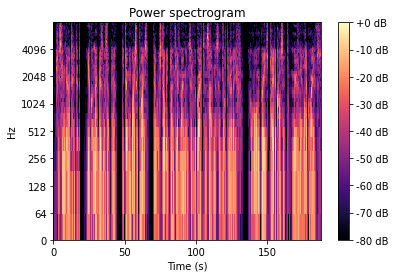

In [16]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),
                               sr=sr,
                               y_axis='log', 
                               x_axis='s', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Dataset

# Init

In [38]:
tmp = tf.constant([[1,2],[3,4],[5,6]])
tmp.shape[0]

3

In [36]:
tmp

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>

In [26]:
test = tf.random.uniform([4,10,5],dtype=tf.dtypes.int32,maxval=100)

In [27]:
test

<tf.Tensor: shape=(4, 10, 5), dtype=int32, numpy=
array([[[40, 91, 95,  3, 40],
        [ 2, 13, 99, 58, 18],
        [66,  6, 99, 59, 60],
        [89, 30, 47, 97, 97],
        [18, 71, 81, 94, 11],
        [55, 18, 19, 47, 97],
        [ 7, 29,  0, 92, 19],
        [15, 57, 39, 81, 12],
        [70, 33, 47, 60, 48],
        [66, 72, 92, 82, 75]],

       [[40, 45, 56, 65, 93],
        [47, 32,  4, 43,  0],
        [ 1, 56, 20, 72, 99],
        [28, 37, 89, 86, 57],
        [ 8, 62, 99, 93, 33],
        [34, 28,  8, 62, 89],
        [66, 82, 78, 57, 74],
        [45, 11,  7, 24, 87],
        [16, 62, 60, 99, 16],
        [14, 49, 69, 19, 46]],

       [[12, 22, 87, 57, 51],
        [80, 12, 80, 66, 63],
        [25, 78, 23, 76, 56],
        [63, 29, 53, 17,  4],
        [26, 93, 65, 17, 57],
        [99, 12, 20,  0, 71],
        [49, 71, 45, 35, 37],
        [41, 10, 71, 33, 21],
        [71, 40, 27, 89, 64],
        [80, 86, 64, 49, 31]],

       [[64, 39, 80,  6, 73],
        [16,  

In [28]:
test = tf.transpose(test,perm=[1,0,2])
test = tf.reshape(test,[10,20])
test

<tf.Tensor: shape=(10, 20), dtype=int32, numpy=
array([[40, 91, 95,  3, 40, 40, 45, 56, 65, 93, 12, 22, 87, 57, 51, 64,
        39, 80,  6, 73],
       [ 2, 13, 99, 58, 18, 47, 32,  4, 43,  0, 80, 12, 80, 66, 63, 16,
         1, 50, 53, 39],
       [66,  6, 99, 59, 60,  1, 56, 20, 72, 99, 25, 78, 23, 76, 56, 17,
        61, 81, 34, 49],
       [89, 30, 47, 97, 97, 28, 37, 89, 86, 57, 63, 29, 53, 17,  4, 28,
        17, 98, 51, 19],
       [18, 71, 81, 94, 11,  8, 62, 99, 93, 33, 26, 93, 65, 17, 57, 57,
        52, 68,  9, 64],
       [55, 18, 19, 47, 97, 34, 28,  8, 62, 89, 99, 12, 20,  0, 71, 43,
        99, 95,  5, 24],
       [ 7, 29,  0, 92, 19, 66, 82, 78, 57, 74, 49, 71, 45, 35, 37, 24,
        17, 48, 11, 64],
       [15, 57, 39, 81, 12, 45, 11,  7, 24, 87, 41, 10, 71, 33, 21, 52,
        51, 28, 63, 58],
       [70, 33, 47, 60, 48, 16, 62, 60, 99, 16, 71, 40, 27, 89, 64, 16,
        61, 77, 23, 57],
       [66, 72, 92, 82, 75, 14, 49, 69, 19, 46, 80, 86, 64, 49, 31, 83,
       